In [15]:
import numpy as np
import torch

In [16]:
dir_path = '/home/sci/nawazish.khan/non-linear-ssm-experiments/supershapes/pytorch-model-NewRun-0-realnvp-non_zero_mean_anisotropic-FullSS/'

In [23]:
cov =  torch.from_numpy(np.load(f'{dir_path}/cov.npy')).float()
eigvalsH =  torch.from_numpy(np.load(f'{dir_path}/eigvalsh.npy')).float()
eigvalsP =  torch.from_numpy(np.load(f'{dir_path}/eigvals.npy')).float()

In [24]:
print(f'{eigvalsP.shape} {eigvalsH.shape}')

torch.Size([3072]) torch.Size([3072])


In [30]:
modes_retained = 0.95

In [68]:
eigvalsH_ = eigvalsH.flip(0)
eigvals = eigvalsH_
q = torch.cumsum(eigvals, dim=0)/eigvals.sum(0)

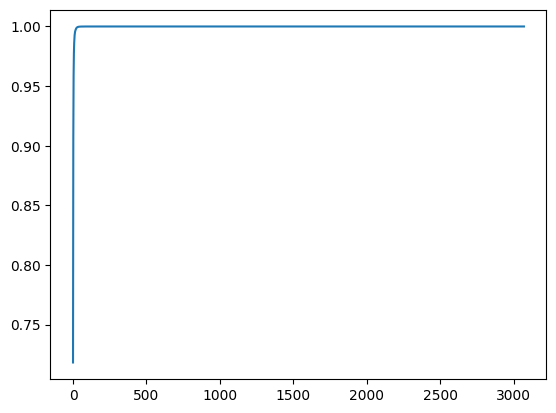

In [69]:
import matplotlib.pyplot as plt

plt.plot(np.arange(q.shape[0]), q.numpy())
plt.show()

In [70]:
indices_retained  = ((torch.cumsum(eigvals, dim=0)/eigvals.sum(0)) > modes_retained).float()
indices_retained.sum(0)

tensor(3068.)

In [71]:
indices_excluded = ((torch.cumsum(eigvals, dim=0)/eigvals.sum(0)) <= modes_retained).float()
indices_excluded.sum(0)

tensor(4.)

In [72]:
remaining_var = ((indices_excluded * eigvals).sum())/indices_excluded.sum()
remaining_var

tensor(6190.6460)

In [73]:
eigvals

tensor([ 1.8948e+04,  3.8629e+03,  1.0948e+03,  ..., -3.0748e-04,
        -4.3423e-04, -1.7342e-03])

In [74]:
eigvals_in = indices_retained * eigvals
eigvals_in

tensor([ 0.0000,  0.0000,  0.0000,  ..., -0.0003, -0.0004, -0.0017])

In [75]:
eigvals_out = indices_excluded * remaining_var
eigvals_out

tensor([6190.6460, 6190.6460, 6190.6460,  ...,    0.0000,    0.0000,
           0.0000])

In [76]:
eigvals_all = eigvals_in + eigvals_out
eigvals_all[0:10]

tensor([6190.6460, 6190.6460, 6190.6460, 6190.6460,  539.1937,  298.9643,
         183.7202,  139.6708,   93.0917,   73.1766])